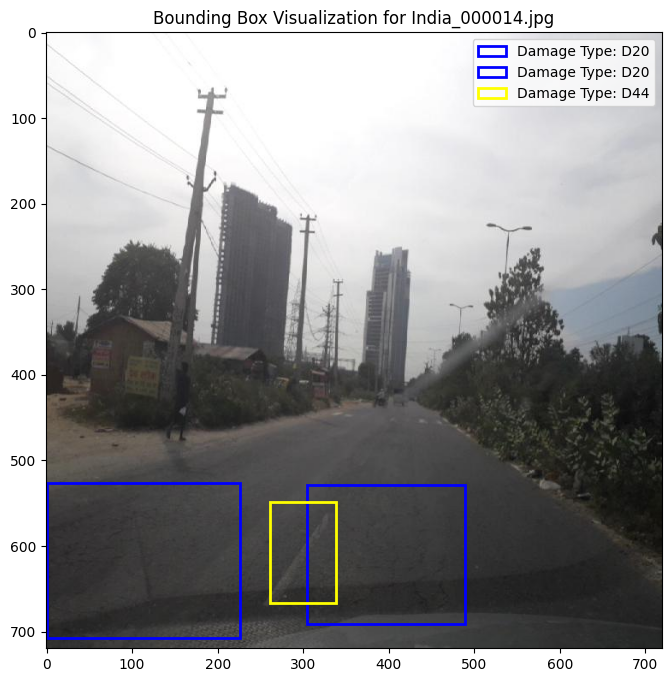

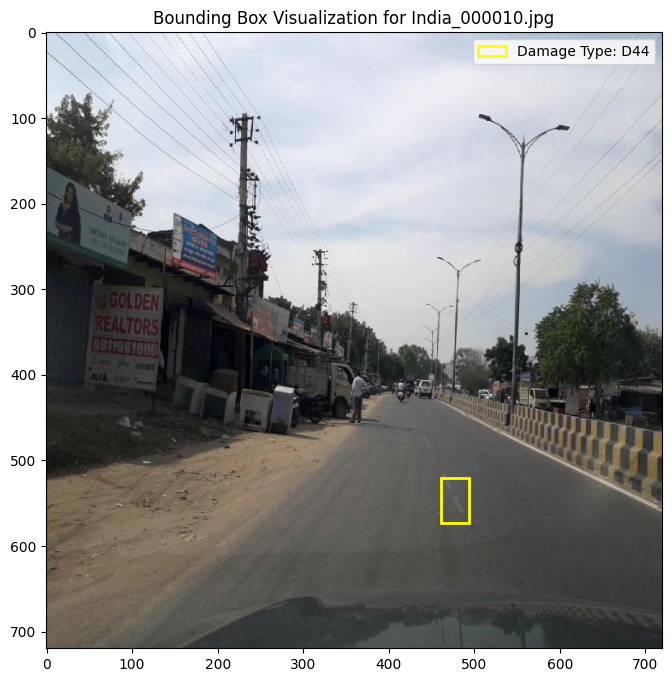

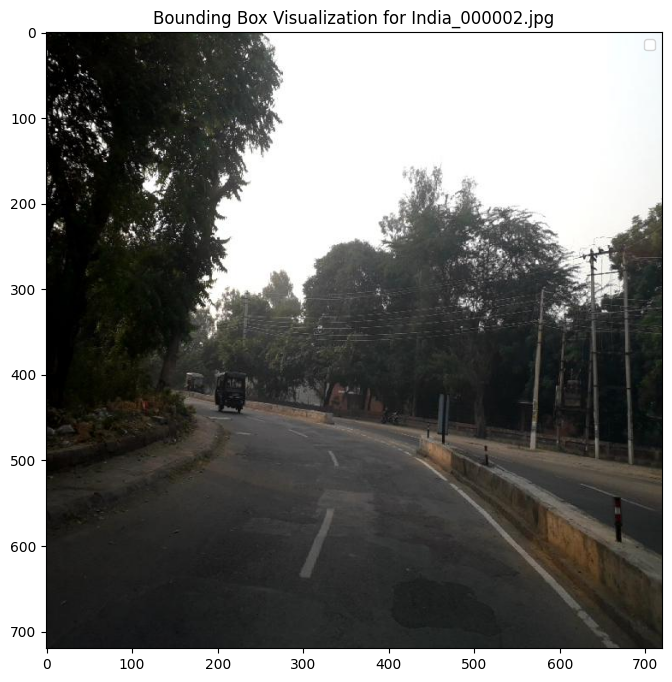

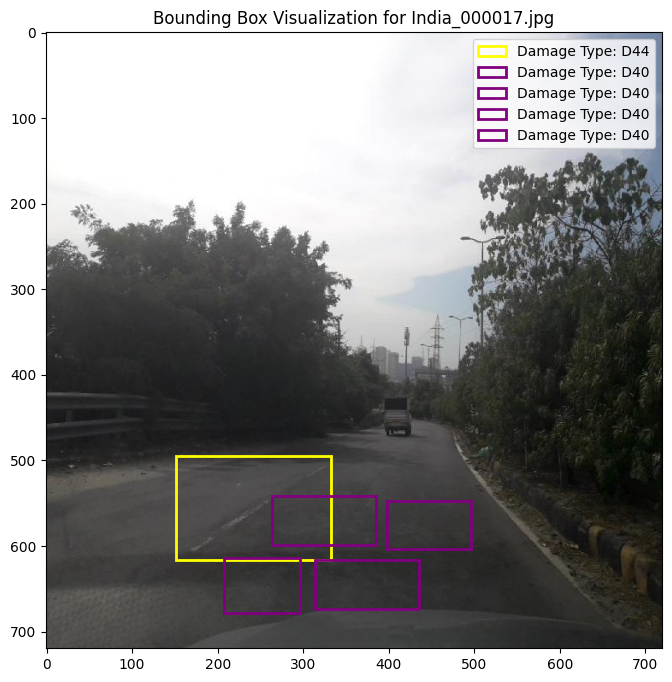

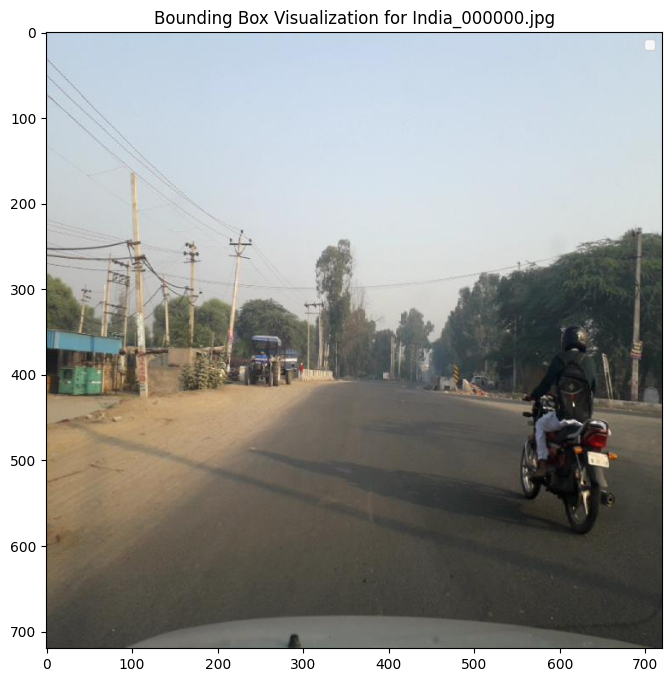

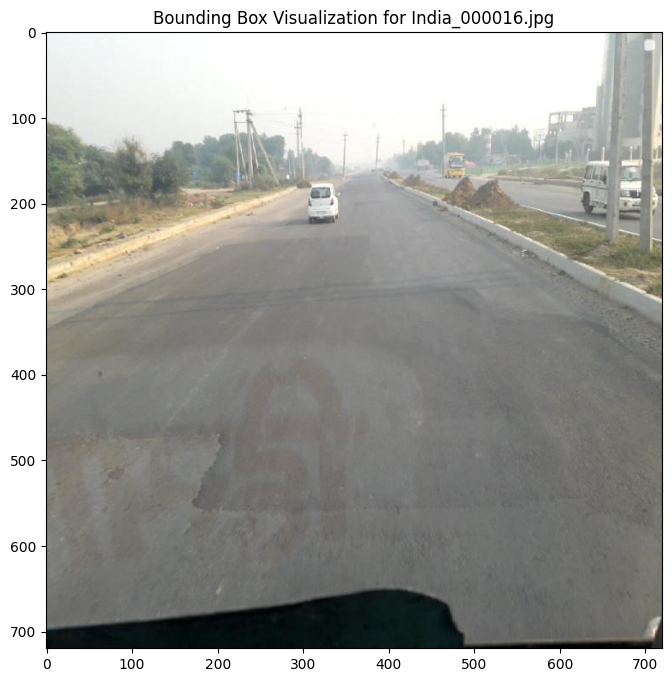

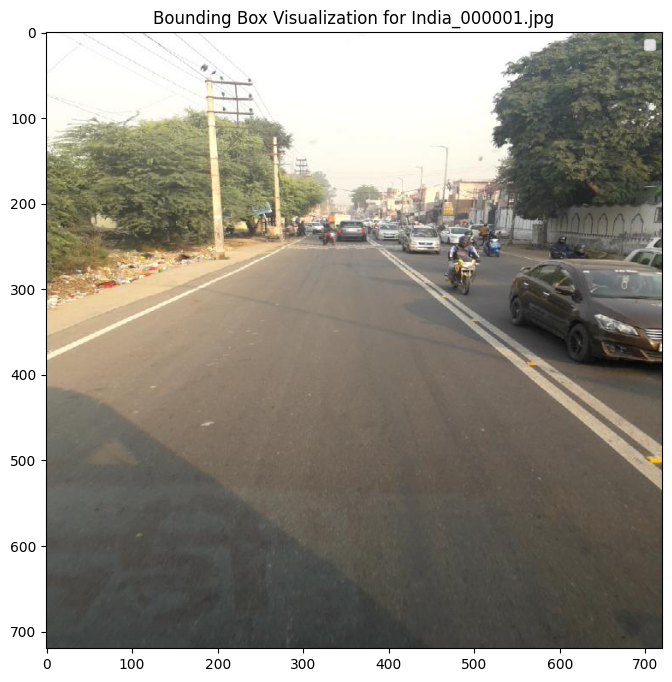

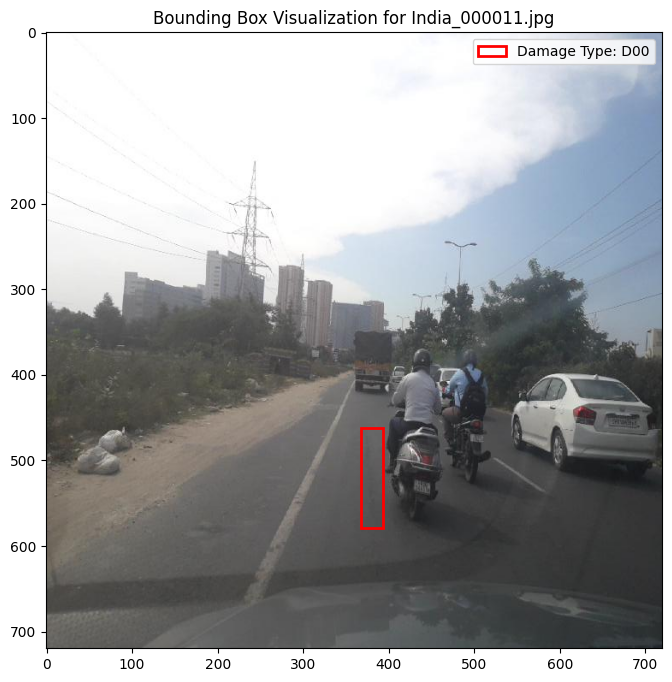

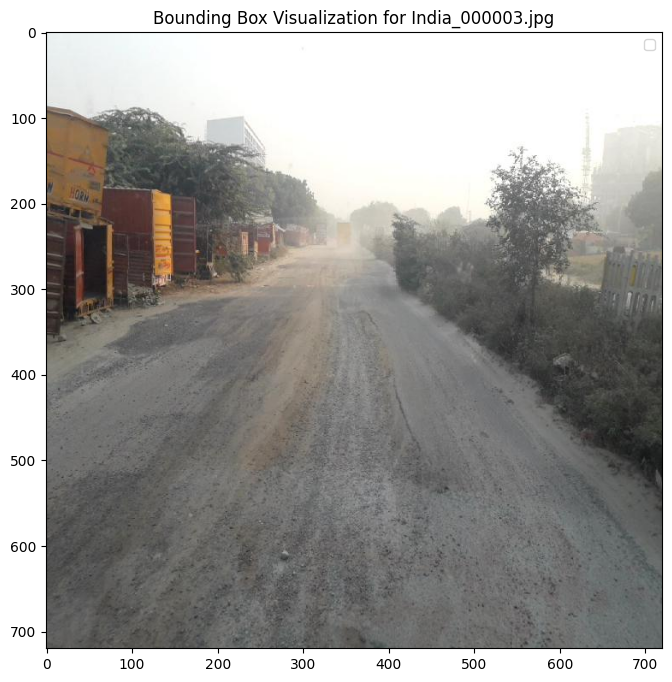

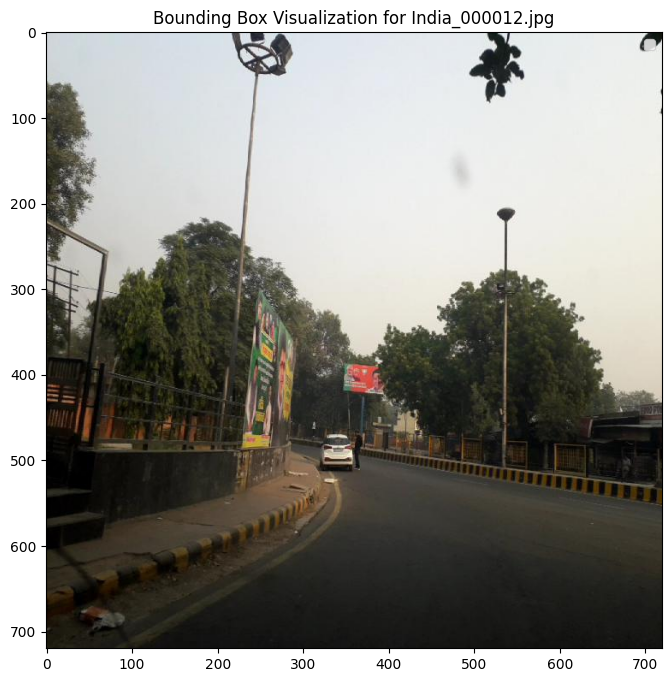

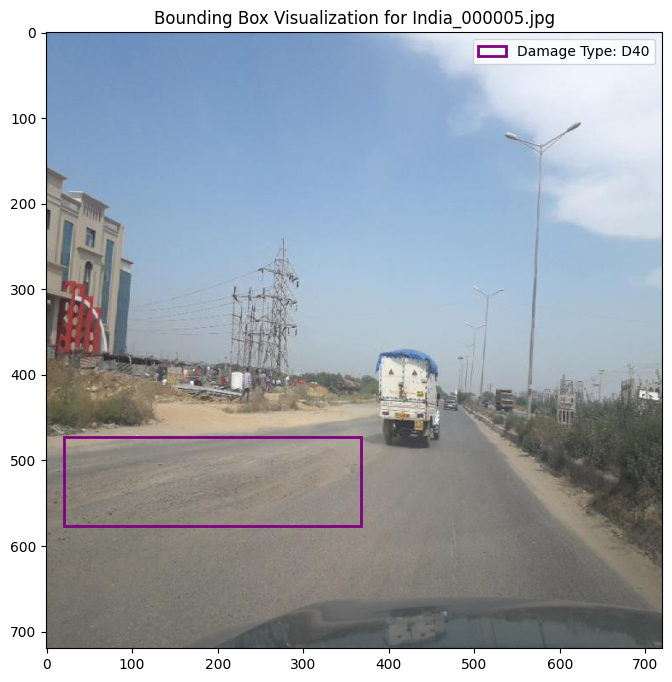

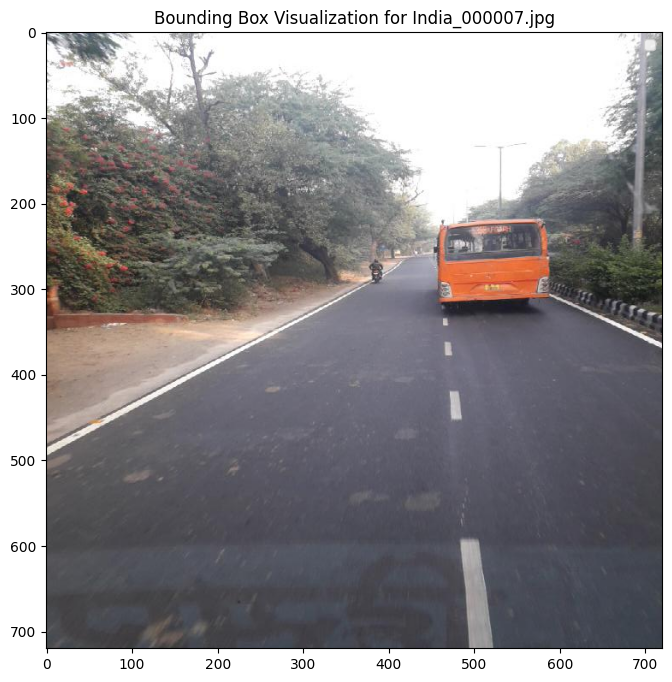

In [7]:

import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches




def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Extract image size
    size_element = root.find("size")
    width = int(size_element.find("width").text)
    height = int(size_element.find("height").text)
    depth = int(size_element.find("depth").text)

    # Extract all damages
    damages = root.findall("object")

    if not damages:
        return {
            'width': width,
            'height': height,
            'depth': depth,
            'damages': []
        }

    # Extract damage details for each type
    damage_list = []
    for damage_element in damages:
        damage_type = damage_element.find("name").text
        bbox_element = damage_element.find("bndbox")
        xmin = int(bbox_element.find("xmin").text)
        ymin = int(bbox_element.find("ymin").text)
        xmax = int(bbox_element.find("xmax").text)
        ymax = int(bbox_element.find("ymax").text)

        damage_info = {
            'damage_type': damage_type,
            'bbox': {'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax}
        }
        damage_list.append(damage_info)

    return {
        'width': width,
        'height': height,
        'depth': depth,
        'damages': damage_list
    }

def visualize_bounding_boxes(image_path, annotation_info):
    image = Image.open(image_path)

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    damages = annotation_info['damages']

    for damage_info in damages:
        bbox = damage_info['bbox']
        damage_type = damage_info['damage_type']

        if bbox is not None:
            # Assign different colors for different damage types
            color_map = {
                'D00': 'red',    # Longitudinal Crack
                'D10': 'green',  # Transverse Crack
                'D20': 'blue',   # Alligator Crack
                'D40': 'purple'  # Pothole
                # Add more colors and damage types as needed
            }

            color = color_map.get(damage_type, 'yellow')  # Default to yellow if the type is not in the map

            # Create a rectangle patch with color
            rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'],
                                     linewidth=2, edgecolor=color, facecolor='none', label=f"Damage Type: {damage_type}")
            ax.add_patch(rect)

    # Create legend
    ax.legend()

    plt.title(f"Bounding Box Visualization for {os.path.basename(image_path)}")
    plt.show()




def import_and_visualize_dataset(root_dir):
    dataset = []

    images_folder = os.path.join(root_dir, 'images')
    annotations_folder = os.path.join(root_dir, 'annot')

    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(images_folder, filename)
            xml_filename = os.path.splitext(filename)[0] + ".xml"
            xml_path = os.path.join(annotations_folder, xml_filename)

            if os.path.exists(xml_path):
                annotation_info = parse_xml(xml_path)
                annotation_info['image_path'] = image_path
                dataset.append(annotation_info)

                visualize_bounding_boxes(image_path, annotation_info)

# Example usage:
root_directory = '/content/'
import_and_visualize_dataset(root_directory)



In [8]:
def segregate_data_by_damage_type(images_folder, annotations_folder):
    data_by_damage_type = {'D00': [], 'D01': [], 'D10': [], 'D11': [], 'D20': [], 'D40': [],'D43': [], 'D44': []}

    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(images_folder, filename)
            xml_filename = os.path.splitext(filename)[0] + ".xml"
            xml_path = os.path.join(annotations_folder, xml_filename)

            if os.path.exists(xml_path):
                annotation_info = parse_xml(xml_path)

                damages = annotation_info['damages']

                for damage_info in damages:
                    damage_type = damage_info['damage_type']
                    bbox = damage_info['bbox']

                    if bbox is not None:
                        entry = {
                            'image_path': image_path,
                            'xmin': bbox['xmin'],
                            'ymin': bbox['ymin'],
                            'xmax': bbox['xmax'],
                            'ymax': bbox['ymax']
                        }

                        data_by_damage_type[damage_type].append(entry)

    return data_by_damage_type

# Example usage:
images_folder = os.path.join(root_directory, 'images')
annotations_folder = os.path.join(root_directory, 'annot')
data = segregate_data_by_damage_type(images_folder, annotations_folder)

# Access data for each damage type
for damageType in data:
  print("Data for " , damageType , ": " , data[damageType])

Data for  D00 :  [{'image_path': '/content/images/India_000011.jpg', 'xmin': 368, 'ymin': 462, 'xmax': 393, 'ymax': 579}]
Data for  D01 :  []
Data for  D10 :  []
Data for  D11 :  []
Data for  D20 :  [{'image_path': '/content/images/India_000014.jpg', 'xmin': 304, 'ymin': 529, 'xmax': 489, 'ymax': 691}, {'image_path': '/content/images/India_000014.jpg', 'xmin': 1, 'ymin': 526, 'xmax': 226, 'ymax': 708}]
Data for  D40 :  [{'image_path': '/content/images/India_000017.jpg', 'xmin': 207, 'ymin': 614, 'xmax': 296, 'ymax': 678}, {'image_path': '/content/images/India_000017.jpg', 'xmin': 314, 'ymin': 616, 'xmax': 435, 'ymax': 674}, {'image_path': '/content/images/India_000017.jpg', 'xmin': 264, 'ymin': 541, 'xmax': 385, 'ymax': 599}, {'image_path': '/content/images/India_000017.jpg', 'xmin': 398, 'ymin': 547, 'xmax': 496, 'ymax': 603}, {'image_path': '/content/images/India_000005.jpg', 'xmin': 20, 'ymin': 473, 'xmax': 368, 'ymax': 576}]
Data for  D43 :  []
Data for  D44 :  [{'image_path': '/co